In [2]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

# 시간 관련
import time

In [3]:
import numpy as np
print(np.__version__)

import pandas as pd
print(pd.__version__)

1.26.4
2.2.2


### 프로젝트 셋팅

In [5]:
from sklearn.model_selection import StratifiedKFold

# 모델 저장 경로
best_model_path = 'model/best_model_classification_7.dat'

# Stratified K-Fold 설정 (분류에 적합)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 평가 결과를 저장할 리스트
f1_score_list = []
model_name_list = []

### 데이터 준비
- 데이터를 읽어오고 필요한 전처리까지 다 한다음 입력데이터는 train_X, 결과데이터는 train_y라는 변수에 담아서 준비해주세요

In [7]:
# 데이터 준비
df1 = pd.read_csv('open/train/마케팅정보 병합_encoded_train.csv')

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Segment 인코딩
encoder1 = LabelEncoder()
df1["Segment"] = encoder1.fit_transform(df1["Segment"])

# 2. ID, 기준년월 제거 후 입력(X), 결과(y) 정의
X = df1.drop(['Segment', 'ID', '기준년월'], axis=1)
y = df1['Segment']  # 이미 인코딩된 상태

# 3. 입력 데이터 표준화
scaler1 = StandardScaler()
X2 = scaler1.fit_transform(X)

# 4. 학습용 데이터 할당
train_X = X2
train_y = y

### 기본 모델 사용하기
- 기본 모델 중에 만족하는 것을 찾았다면 하이퍼 파라미터 튜닝 과정은 생략하세요

In [10]:
# XGBoost
xgboost_basic_model = XGBClassifier(verbose=-1, silent=True)
# 교차 검증을 수행한다
r1 = cross_val_score(xgboost_basic_model, train_X, train_y, scoring='f1_macro', cv=cv)
# 평가 결과를 담아준다.
f1_score_list.append(r1.mean())
# 학습 모델 이름을 담아준다.
model_name_list.append("XGBoost Basic")

### 하이퍼 파라미터 튜닝

In [12]:
# # XGBoost
# params = {
#     'booster' : ['gbtree', 'gblinear'],
#     'n_estimators' : [50, 100, 150, 200, 250, 300],
#     'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1, 0, 10, 100, 1000, 10000]
# }

# temp_model = XGBClassifier(verbose=-1, silent=True)
# xgboost_grid_clf = GridSearchCV(temp_model, param_grid=params, scoring='f1_macro', cv=cv)
# xgboost_grid_clf.fit(train_X, train_y)

# # 평가 결과를 담아준다.
# f1_score_list.append(xgboost_grid_clf.best_score_)
# # 학습 모델 이름을 담아준다.
# model_name_list.append("XGBoost Tuning")

In [13]:
d1 = {
    'f1 score' : f1_score_list
}
result_df = pd.DataFrame(d1, index=model_name_list)
result_df.sort_values(by='f1 score', ascending=False, inplace=True)
result_df

,f1 score
XGBoost Basic,0.210206


In [14]:
# 최종 모델 학습
best_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
# best_model.set_params(**xgboost_grid_clf.best_params_)
best_model.fit(train_X, train_y)
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [15]:
# 학습 모델 등을 저장한다.
with open(best_model_path, 'wb') as fp :
    pickle.dump(best_model, fp)
    pickle.dump(encoder1, fp)
    pickle.dump(scaler1, fp)

print('저장완료')

저장완료


In [16]:
# 저장 확인
with open(best_model_path, 'rb') as fp :
    test_model = pickle.load(fp)
    test_encoder = pickle.load(fp)
    test_scaler1 = pickle.load(fp)

📌 F1 Score (macro): 0.2375

📊 Classification Report:
              precision    recall  f1-score   support

           A       0.90      0.02      0.04       972
           B       1.00      0.05      0.09       144
           C       0.48      0.04      0.07    127590
           D       0.47      0.06      0.10    349242
           E       0.81      0.99      0.89   1922052

    accuracy                           0.80   2400000
   macro avg       0.73      0.23      0.24   2400000
weighted avg       0.74      0.80      0.73   2400000

📊 Confusion Matrix:
[[     18       0      67      93     794]
 [      0       7      12      16     109]
 [      1       0    4506    8590  114493]
 [      0       0    2787   19512  326943]
 [      1       0    2094   13571 1906386]]


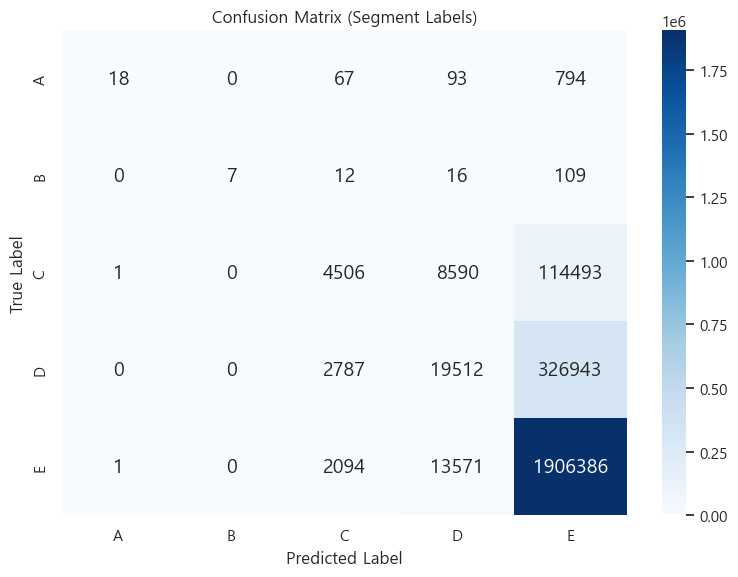

In [17]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 예측
y_pred = test_model.predict(train_X)

# 📌 F1 점수 계산 (macro)
f1 = f1_score(train_y, y_pred, average='macro')
print(f"📌 F1 Score (macro): {f1:.4f}")

# ✅ 원래 세그먼트 라벨로 복원
true_labels = encoder1.inverse_transform(train_y)
pred_labels = encoder1.inverse_transform(y_pred)
label_names = encoder1.classes_  # ['A', 'B', 'C', 'D', 'E']

# 📊 Classification Report (라벨명 기준)
print("\n📊 Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=label_names))

# 📊 Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels, labels=label_names)
print("📊 Confusion Matrix:")
print(cm)

# 🎨 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)
plt.title("Confusion Matrix (Segment Labels)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()